## Implementing an exponential filter model to estimate soil water content in the entire root-zone

**Name**: Pedro Rossini <br/>
**Project area**: Agronomy, Irrigation crops

## Objective
Create a python function to estimate daily soil water content of the entire root-zone (0 to 80 cm) from surface observations (0 to 5 cm) using an exponential filter model.


## Rationale and methodology

Accurate measurements of soil water content at root-zone remain decisive in agriculture among other disciplines. In irrigated cropping systems accurate monitoring of soil water content is a key factor to improve crops yield and the water use efficiency.

The exponential filter is a known analytical method, that divide the soil profile in two layers: surface and sub-surface where the objetive is predict sub-surface layer soil moisture from measured the surface layer (Wagner et al., 1999).  

The model has only 3 parameters, SWCSURF that represents the soil moisture observed at the surface, SURFMAX that represents the maximum amount of water that the surface can hold and K that is related to the gaps between observations and it can take values between 0 and 1.



The exponential filter model equation:

<br/>
<img src="SWI_eq.JPG" alt="sketch_image" width="500"/>
<br/>
 

The initial SWI (t=1) will be estimated using soil moisture observations from a Mesonet station (0-5 cm depth) divided by the maximum amount of water that the layer can hold.
Daily soil moisture observations at 5 cm depth from Kansas Mesonet will be use as a main input of the model (SWCSURF(t)). On the other hand, daily soil moisture observations at 10, 20, and 50 cm depth will be used to calibrate and validate the model predictions.


## Sketch
 
<img src="Soil_2.JPG" alt="sketch_image" width="500"/>

Figure 1. Sketch summary the workflow proposed for this project.

#### Import the modules


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Import data

In [10]:
dirname = '/Users/prossini/Desktop/coding/Project_SWI/'
filname = 'meso_data.csv'

In [11]:
mesonet_data = pd.read_csv(dirname + filname)
#mesonet_data.head(5)

#### Mesonet soil sensors data
##### Sensors depth: 5cm, 10cm, 20cm, 50cm

In [12]:
# Calculate SWC in each layer expressed in milimeters

SWC5 = mesonet_data.VWC5CM * 50
SWC10 = (mesonet_data.VWC5CM  + mesonet_data.VWC10CM)/2 * 50
SWC20 = (mesonet_data.VWC10CM + mesonet_data.VWC20CM)/2 * 100
SWC50 = (mesonet_data.VWC20CM + mesonet_data.VWC50CM)/2 * 300

profile_SWC_sensors = SWC5 + SWC10 + SWC20 + SWC50
sub_surface_SWC_sensors = SWC10 + SWC20 + SWC50;

In [13]:
# Calculate vwc in each layer expressed in volume

vwc5 = mesonet_data.VWC5CM;
vwc10 = mesonet_data.VWC10CM;
vwc20 = mesonet_data.VWC20CM;
vwc50 = mesonet_data.VWC50CM;

profile_vwc_sensors = 2*vwc5*0.05 + (vwc5+vwc10)*0.1 + (vwc10+vwc20)*0.2 + (vwc20+vwc50)*0.5 / 2*(0.05+0.10+0.2+0.50);
sub_surface_vwc_sensors = 2*vwc10*0.1 + (vwc10+vwc20)*0.2 + (vwc20+vwc50)*0.5 / 2*(0.10+0.2+0.50);

### Implement Exponential filter model

In [14]:
# Defining parameters

k = 0.9
surface_max_storage = 0.39
sub_surf_max_storage = np.max(sub_surface_vwc_sensors)
profile_SWC = [(100)];
SWI = [(vwc5[0]/surface_max_storage)]


for i in range(1,len(vwc5)):
    new_SWI = SWI[i-1] + k *((vwc5[i]/surface_max_storage) - SWI[i-1])
    SWI.append(new_SWI)
    sub_surf_storage = SWI[i] * np.max(sub_surface_vwc_sensors)- np.min(sub_surface_vwc_sensors)+ np.min(sub_surface_vwc_sensors)
    profile_SWC_est = (vwc5[i] * 50) + (sub_surf_storage * 450)
    profile_SWC.append(profile_SWC_est)  

### Ploting Observed data vs estimated

Text(0, 0.5, 'Soil water content (mm)')

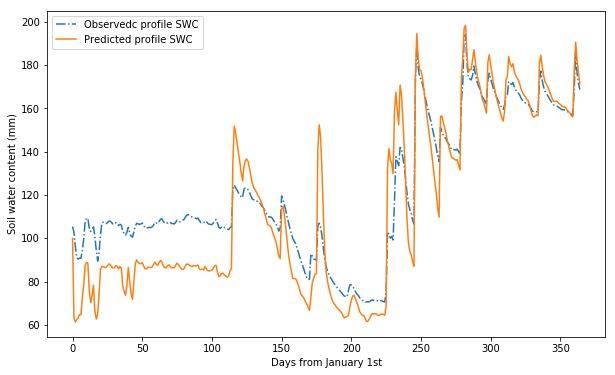

In [31]:
plt.figure(figsize=(10,6))
plt.plot(profile_SWC_sensors,'-.')
plt.plot(profile_SWC)
plt.legend(['Observedc profile SWC','Predicted profile SWC'])
plt.xlabel('Days from January 1st')
plt.ylabel('Soil water content (mm)')

### Evaluate the model

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(profile_SWC_sensors,profile_SWC_est)
plt.ylim(40,200)
plt.xlim(40,200)
x = np.arange(40,200)
y = np.arange(40,200)
plt.plot(x,y)